## 实现 Simple Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([1., 2., 3., 4., 5.])
y = np.array([1., 3., 2., 4., 5.])

[0, 6, 0, 6]

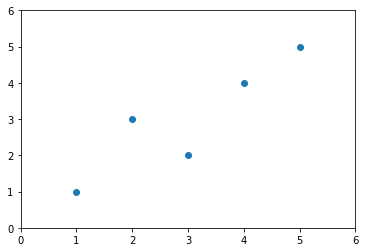

In [6]:
plt.scatter(x, y)
plt.axis([0, 6, 0, 6])

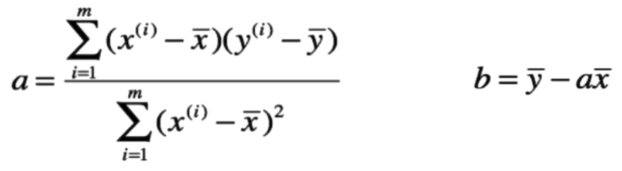

In [7]:
x_mean = np.mean(x)
y_mean = np.mean(y)

In [8]:
num = 0.0
d = 0.0
# for x_i, y_i in zip(x, y):
#     num += (x_i - x_mean) * (y_i - y_mean)
#     d += (x_i - x_mean) ** 2

### 向量化运算

In [15]:
num = (x - x_mean).dot(y - y_mean)
d = (x - x_mean).dot(x - x_mean)

In [16]:
a = num / d
b = y_mean - a * x_mean

In [17]:
a, b

(0.9, 0.2999999999999998)

In [11]:
y_hat = a*x + b

[0, 6, 0, 6]

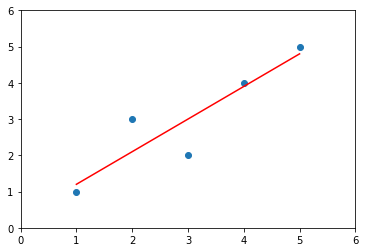

In [14]:
plt.scatter(x, y)
plt.plot(x, y_hat, color='r')
plt.axis([0, 6, 0, 6])

## 衡量回归算法的标准

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
from sklearn import datasets

In [21]:
boston = datasets.load_boston()

In [23]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [24]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [26]:
# 只使用房间数量这个特征
x = boston.data[:, 5] 

In [27]:
x.shape

(506,)

In [28]:
y = boston.target

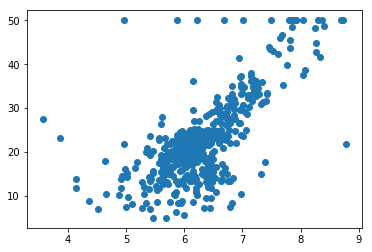

In [29]:
plt.scatter(x, y)

In [30]:
np.max(y)

50.0

In [31]:
x = x[y < 50]
y = y[y < 50]

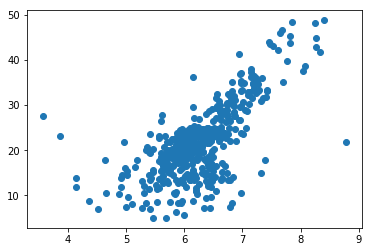

In [32]:
plt.scatter(x, y)

### 使用自己封装的线性回归

In [34]:
from algorithm.model_selection import train_test_split
from algorithm.SimpleLinearRegression import SimpleLinearRegression

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, seed=666)

In [36]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((392,), (98,), (392,), (98,))

In [37]:
reg = SimpleLinearRegression()

In [38]:
reg.fit(x_train, y_train)

SimpleLinearRegression()

In [39]:
reg.a_, reg.b_

(7.8608543562689555, -27.459342806705543)

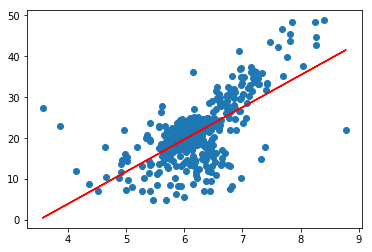

In [40]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), color="r")

In [41]:
y_predict = reg.predict(x_test)

#### MSE

In [42]:
mse_test = np.sum((y_predict - y_test)**2) / len(y_test)
mse_test

24.156602134387438

#### RMSE

In [43]:
from math import sqrt

In [45]:
rmse_test = sqrt(mse_test)
rmse_test

4.914936635846635

#### MAE

In [46]:
mae_test = np.sum(np.absolute(y_predict - y_test)) / len(y_test)
mae_test

3.5430974409463873

#### scikit—learn 中的MSE和MAE

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [48]:
mean_squared_error(y_test, y_predict)

24.156602134387438

In [49]:
mean_absolute_error(y_test, y_predict)

3.5430974409463873

### R Square

In [55]:
R2_score = 1 - mean_squared_error(y_predict, y_test) / np.var(y_test)
R2_score

0.6129316803937322

In [56]:
from sklearn.metrics import r2_score

In [57]:
r2_score(y_test, y_predict)

0.6129316803937324

In [59]:
# sklearn中封装的score返回R^2
reg.score(x_test, y_test)

0.6129316803937322

## 多元线性回归

In [79]:
import numpy as np
import matplotlib.pyplot as plt

In [80]:
from sklearn import datasets

In [81]:
boston = datasets.load_boston()

In [82]:
# 使用所有特征
X = boston.data
y = boston.target

X = X[y < 50]
y = y[y < 50]

In [83]:
X.shape, y.shape

((490, 13), (490,))

### 使用自己封装的多元线性回归

In [84]:
from algorithm.model_selection import train_test_split
from algorithm.LinearRegression import LinearRegression

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

In [88]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((392, 13), (98, 13), (392,), (98,))

In [89]:
reg = LinearRegression()

In [90]:
reg.fit_normal(X_train, y_train)

LinearRegression()

In [91]:
reg.coef_

array([-1.20354261e-01,  3.64423279e-02, -3.61493155e-02,  5.12978140e-02,
       -1.15775825e+01,  3.42740062e+00, -2.32311760e-02, -1.19487594e+00,
        2.60101728e-01, -1.40219119e-02, -8.35430488e-01,  7.80472852e-03,
       -3.80923751e-01])

In [92]:
reg.intercept_

34.117399723204585

In [93]:
reg.score(X_test, y_test)

0.8129794056212895

### 使用sklearn解决回归问题

#### Linear Regression

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
lin_reg = LinearRegression()

In [96]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [97]:
lin_reg.coef_

array([-1.20354261e-01,  3.64423279e-02, -3.61493155e-02,  5.12978140e-02,
       -1.15775825e+01,  3.42740062e+00, -2.32311760e-02, -1.19487594e+00,
        2.60101728e-01, -1.40219119e-02, -8.35430488e-01,  7.80472852e-03,
       -3.80923751e-01])

In [98]:
lin_reg.intercept_

34.117399723229845

In [99]:
lin_reg.score(X_test, y_test)

0.8129794056212809

#### kNN Regressor

In [100]:
from sklearn.neighbors import KNeighborsRegressor

In [101]:
knn_reg = KNeighborsRegressor(5)

In [102]:
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [103]:
knn_reg.score(X_test, y_test)

0.5865412198300899

In [104]:
 from sklearn.model_selection import GridSearchCV

In [105]:
param_grid = [
    {
        'weights': ['uniform'],
        'n_neighbors': [i for i in range(1, 11)]
    },
    {
        'weights': ['distance'],
        'n_neighbors': [i for i in range(1, 11)],
        'p': [i for i in range(1, 6)]
    }
]

In [107]:
knn_reg = KNeighborsRegressor()
grid_search = GridSearchCV(knn_reg, param_grid, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


/Users/aeternae/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    1.7s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [108]:
grid_search.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [109]:
grid_search.best_score_

0.6340477954176972

In [110]:
grid_search.best_estimator_.score(X_test, y_test)

0.7044357727037996

### coef的可解释性

In [111]:
lin_reg.coef_

array([-1.20354261e-01,  3.64423279e-02, -3.61493155e-02,  5.12978140e-02,
       -1.15775825e+01,  3.42740062e+00, -2.32311760e-02, -1.19487594e+00,
        2.60101728e-01, -1.40219119e-02, -8.35430488e-01,  7.80472852e-03,
       -3.80923751e-01])

In [114]:
arg = np.argsort(lin_reg.coef_)
arg

array([ 4,  7, 10, 12,  0,  2,  6,  9, 11,  1,  3,  8,  5])

In [113]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [115]:
boston.feature_names[arg]

array(['NOX', 'DIS', 'PTRATIO', 'LSTAT', 'CRIM', 'INDUS', 'AGE', 'TAX',
       'B', 'ZN', 'CHAS', 'RAD', 'RM'], dtype='<U7')

In [116]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu